# Project - Twitter US Airline Sentiment
## Background and Context:

Twitter posses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other side, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/services on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand, and their competitors, and discover new trends in the industry.

 

## Data Description:

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

 

## Dataset:

The dataset has the following columns:

tweet_id                                                           
airline_sentiment                                               
airline_sentiment_confidence                               
negativereason                                                   
negativereason_confidence                                    
airline                                                                    
airline_sentiment_gold                                              
name     
negativereason_gold 
retweet_count
text
tweet_coord
tweet_created
tweet_location 
user_timezone
Objective:

To implement the techniques learnt as a part of the course.


Learning Outcomes:

Basic understanding of text pre-processing.
What to do after text pre-processing
Bag of words
Tf-idf
Build the classification model.
Evaluate the Model
Steps and tasks:

1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)
2. Understand of data-columns: (5 Marks)
     a. Drop all other columns except “text” and “airline_sentiment”.
     b. Check the shape of the data.
     c. Print the first 5 rows of data.
3. Text pre-processing: Data preparation. (16 Marks)
NOTE:- Each text pre-processing steps should be mentioned in the notebook separately.
     a. Html tag removal.
     b. Tokenization.
     c. Remove the numbers.
     d. Removal of Special Characters and Punctuations.
     e. Conversion to lowercase.
     f. Lemmatize or stemming.
     g. Join the words in the list to convert back to text string in the data frame. (So that each row
          contains the data in text format.)
     h. Print the first 5 rows of data after pre-processing.
4. Vectorization: (10 Marks)
    a. Use CountVectorizer.
    b. Use TfidfVectorizer.
5. Fit and evaluate the model using both types of vectorization. (6+6 Marks)
6. Summarize your understanding of the application of Various Pre-processing and Vectorization
     and performance of your model on this dataset. (8 Marks)
7.Overall notebook should have:(4 Marks)
     a. Well commented code
     b. Structure and flow

 

Best Practices for Notebook : 

The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
The notebook should be run from start to finish in a sequential manner before submission.
It is preferable to remove all warnings and errors before submission.
 

Submission Guidelines :

The submission should be a well-commented Jupyter notebook [format - .html and .ipynb]
Any assignment found copied/ plagiarized with other groups will not be graded and awarded zero marks
Please ensure timely submission as any submission post-deadline will not be accepted for evaluation
Submission will not be evaluated if,
it is submitted post-deadline, or,
more than 2 files are submitted
Happy Learning!!

 

 

Regards

Program Office

Happy Learning!

In [ ]:
import re, unicodedata, string
import numpy as np                                 
import pandas as pd                              
import nltk          


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                  
from nltk.stem import PorterStemmer                
from nltk.tokenize import word_tokenize 
from nltk.stem.wordnet import WordNetLemmatizer
from bs4 import BeautifulSoup

from sklearn.feature_extraction.text import CountVectorizer          
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Load dataset:

In [2]:
train = pd.read_csv("tweets.csv")

## Shape of dataset:

In [3]:
train.shape

(14640, 15)

In [4]:
train.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


## Description of Dataset:

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
train.columns.values

array(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'], dtype=object)

## Drop all columns except text and airline_sentiment:

In [7]:
data = train.loc[:14640, ['airline_sentiment', 'text']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airline_sentiment  14640 non-null  object
 1   text               14640 non-null  object
dtypes: object(2)
memory usage: 228.9+ KB


In [8]:
data.shape

(14640, 2)

## First 5 rows of data:

In [9]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [10]:
print (data["airline_sentiment"][0])

neutral


## HTML tag removal:

In [11]:
# using beautiful soup to remove HTML text:
def text_cleaner(text):
    soup = BeautifulSoup(text, "html.parser") 
    bs = soup.get_text()
    return bs

# Applying beautifulsoup function to remove HTML code from the dataset:
for i, row in data.iterrows():
    text = data.at[i, 'text']
    clean_text = text_cleaner(text)
    data.at[i,'clean_text'] = clean_text
data.head()

,airline_sentiment,text,clean_text
0,neutral,@VirginAmerica What @dhepburn said.,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...,@VirginAmerica and it's a really big bad thing...


## Tokenization

In [12]:
# tokenizing the dataset:
data['clean_text'] = data.apply(lambda row: nltk.word_tokenize(row['clean_text']), axis=1)

## Removing stopwords

In [13]:
stoplist = set(stopwords.words("english"))
# removing stopwords:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stoplist:
            new_words.append(word) 
    return new_words
# Applying the remove_stopwards function to remove stopwards in the dataset:
data['clean_text'] = data.apply(lambda row: remove_stopwords(row['clean_text']), axis=1)

 ## Text Cleaning (coversion to lowercase, removal of nonascii characters, remove special characters and punctuation, etc.)

In [14]:
lemmatizer = WordNetLemmatizer()

# convert all characters to lowercase:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
        #new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_words

#remove non-ascii characters:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

#remove punctuation:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

#removing numbers:
def remove_numbers(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'\d+', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

# Lemmatizing:
def lemmatize_list(words):
    new_words = []
    for word in words:
        new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

# performing the preprocessing:
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = lemmatize_list(words)
    words = remove_numbers(words)
    return ' '.join(words)

# running the dataset through the preprocessor:
data['clean_text'] = data.apply(lambda row: normalize(row['clean_text']), axis=1)


## First 5 rows of data after pre-processing

In [15]:
data.head()

,airline_sentiment,text,clean_text
0,neutral,@VirginAmerica What @dhepburn said.,virginamerica what dhepburn say
1,positive,@VirginAmerica plus you've added commercials t...,virginamerica plus ve add commercials experien...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,virginamerica i nt today must mean i need take...
3,negative,@VirginAmerica it's really aggressive to blast...,virginamerica s really aggressive blast obnoxi...
4,negative,@VirginAmerica and it's a really big bad thing...,virginamerica s really big bad thing


## Vectorization using CountVectorizer:

In [16]:
# Creating the CountVectorizer model:
vectorizer = CountVectorizer(max_features=1000)                
data_features = vectorizer.fit_transform(data['clean_text'])
data_features = data_features.toarray()   
data_features.shape

(14640, 1000)

In [17]:
# changing sentiment categories from strings into ints:
data['airline_sentiment'].replace(to_replace='positive', value=2, inplace=True)
data['airline_sentiment'].replace(to_replace='negative', value=0, inplace=True)
data['airline_sentiment'].replace(to_replace='neutral', value=1, inplace=True)
y = data['airline_sentiment']
y = y.astype('int')

In [18]:
# Splitting data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(data_features, y, test_size=0.3, random_state=42)

In [19]:
# Using random forest classifier to predict sentiment:
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)
print(forest)
print(np.mean(cross_val_score(forest, data_features, y, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7080601092896175


In [20]:
result = forest.predict(X_test)

[[2475  253   86]
 [ 375  431   78]
 [ 200  105  389]]


<AxesSubplot:>

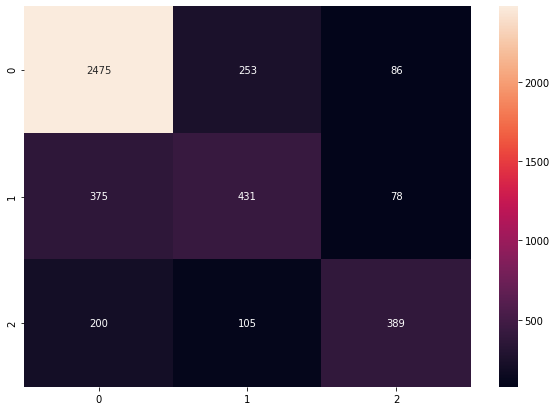

In [21]:
# Printing confidence matrix and heatmap of random forest classifier used on tweet sentiment data:
conf_mat = confusion_matrix(y_test, result)
print(conf_mat)
df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"], columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

## Vectorization using TfidVectorizer

In [22]:
# Creating the TfidVVectorizer model, limiting the number of features to 1000:
vectorizer = TfidfVectorizer(max_features=1000)
data_features = vectorizer.fit_transform(data['clean_text'])
data_features = data_features.toarray()
data_features.shape

(14640, 1000)

In [23]:
# Splitting the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(data_features, y, test_size=0.3, random_state=42)

In [24]:
# Using random forest classifier to determine sentiment of airline tweets:
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)
print(forest)
print(np.mean(cross_val_score(forest, data_features, y, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7094945355191257


In [25]:
result = forest.predict(X_test)

<AxesSubplot:>

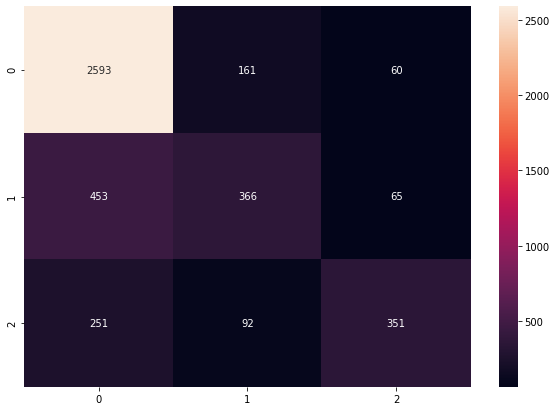

In [26]:
# Printing the confidence matrix and heatmap of the random forest classifier for the classification of sentiment from the airline tweets:
conf_mat2 = confusion_matrix(y_test, result)
df_cm2 = pd.DataFrame(conf_mat2, index = [i for i in "012"], columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm2, annot=True, fmt='g')

## Summary:
- Both vectorization models performed strongest at predicting negative comments.
- Both models seemed to struggle more with predicting neutral and positive comments.
- It may be a good idea to combine positive and neutral into one category, so only two categories need to be predicted.  Neutral comments are not negative, and as long as negative comments are kept separate, there should be a clean delineation between good experience versus bad experience, which is what we really want to know.  Neutral people haven't had a bad experience, so they can be lumped in with the positive people.
- Both models produced roughly the same accuracy (~70%).
- Without preprocessing, the vectorization processing time is likely to be much longer since there are significantly more words, words that specifically have no use and will not help the machine make any decisions.  
- The ability to append or adjust the stop word list is great, since it is likely what constitutes a stop word in one analysis may not hold true in another.
- The question I kept wondering is how much preprocessing should I perform?  It seems like there is a great deal you can do when preprocessing, but at some point, are you possibly changing the value of your data?  Is applying too much preprocessing almost like overfitting a model?
- Lemmatization seems particularly useful, as word lemmas condense several identical meaning words into their base form.  This means that there are less words that will need to be processed in the future, and creates a more robust dataset.